In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

Compiling complete dataframe

In [2]:
df_lsa = pd.read_csv("df_lsa_elbow.csv")

In [3]:
df_lsa

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4
0,0.341025,0.182753,0.008214,0.140406,-0.156943
1,0.232158,-0.045496,0.187131,-0.000936,0.018518
2,0.261225,0.100324,-0.043622,0.141860,-0.034786
3,0.243491,0.034313,0.080290,-0.165609,0.019773
4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558
...,...,...,...,...,...
42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585
42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141
42974,0.000000,0.000000,0.000000,0.000000,0.000000
42975,0.324915,0.131823,-0.099424,0.065491,0.038437


In [4]:
df_no_lsa = pd.read_csv("df_final_mlp.csv")

In [5]:
df_no_lsa

,hybrid,indica,sativa,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,lsa_5,lsa_6,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
0,1,0,0,0.418311,0.274948,-0.046076,0.079432,-0.283345,0.110858,-0.001165,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
1,1,0,0,0.348428,-0.018824,0.353926,0.053830,0.027603,0.041568,-0.021110,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
2,1,0,0,0.384142,0.220097,-0.067963,0.086681,-0.166829,-0.105413,0.004228,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
3,1,0,0,0.353262,0.104061,0.170056,-0.155247,0.225551,-0.090213,-0.154757,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
4,1,0,0,0.391750,-0.092959,-0.142575,-0.140255,0.217436,-0.074387,-0.211877,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0,1,0,0.195335,-0.041536,0.022845,-0.037624,0.018596,-0.038189,-0.089364,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42973,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42974,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42975,0,1,0,0.424053,0.201999,-0.126061,0.001543,-0.122060,-0.079580,0.264316,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263


In [6]:
df_no_lsa = df_no_lsa.drop(['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'lsa_5',
 'lsa_6',
 'lsa_7',
 'lsa_8',
 'lsa_9',
 'lsa_10',
 'lsa_11',
 'lsa_12',
 'lsa_13',
 'lsa_14',
 'lsa_15',
 'lsa_16',
 'lsa_17',
 'lsa_18',
 'lsa_19',
 'lsa_20',
 'lsa_21',
 'lsa_22',
 'lsa_23',
 'lsa_24',
 'lsa_25',
 'lsa_26',
 'lsa_27',
 'lsa_28',
 'lsa_29',
 'lsa_30'], axis = 1)

In [7]:
df_no_lsa

,hybrid,indica,sativa,anxiety,anxious,aroused,arthritis,creative,depression,dizzy,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
0,1,0,0,0,0,0,0,0,0,1,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
1,1,0,0,0,0,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
2,1,0,0,0,0,1,0,1,0,1,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
3,1,0,0,0,0,0,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
4,1,0,0,0,0,0,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42973,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42974,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42975,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263


In [8]:
df_knn = pd.concat([df_lsa, df_no_lsa], axis = 1)

In [9]:
df_knn.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'woody',
 'X..D

In [10]:
df_knn

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,anxious,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263


Splitting dependent and independent variables

In [11]:
X = df_knn.drop(['X..Delta9-THC',
 'X..CBD',
 'X..CBN',
 'X..CBG',
 'X..CBC',
 'X..THCV',
 'X..D-Limonene',
 'X..Beta-Ocimene',
 'X..Beta-Myrcene',
 'X..Beta-Pinene',
 'X..Linalool',
 'X..Alpha-Pinene',
 'X..Camphene',
 'X..3-Carene',
 'X..Alpha-Terpinene',
 'X..Ocimene',
 'X..Eucalyptol',
 'X..Terpinolene',
 'X..Isopulegol',
 'X..Geraniol',
 'X..Guaiol',
 'X..CaryophylleneOxide',
 'X..Alpha-Bisabolol'], axis = 1)
y = df_knn[['X..Delta9-THC',
 'X..CBD',
 'X..CBN',
 'X..CBG',
 'X..CBC',
 'X..THCV',
 'X..D-Limonene',
 'X..Beta-Ocimene',
 'X..Beta-Myrcene',
 'X..Beta-Pinene',
 'X..Linalool',
 'X..Alpha-Pinene',
 'X..Camphene',
 'X..3-Carene',
 'X..Alpha-Terpinene',
 'X..Ocimene',
 'X..Eucalyptol',
 'X..Terpinolene',
 'X..Isopulegol',
 'X..Geraniol',
 'X..Guaiol',
 'X..CaryophylleneOxide',
 'X..Alpha-Bisabolol']]

Plotting histograms on target variable

In [12]:
y_array = y.to_numpy()
y_array

array([[0.25971245, 0.00104646, 0.13793103, ..., 0.44444444, 0.        ,
        0.        ],
       [0.25971245, 0.00104646, 0.13793103, ..., 0.44444444, 0.        ,
        0.        ],
       [0.25971245, 0.00104646, 0.13793103, ..., 0.44444444, 0.        ,
        0.        ],
       ...,
       [0.56255736, 0.00104646, 0.10344828, ..., 0.22222222, 0.        ,
        0.10526316],
       [0.56255736, 0.00104646, 0.10344828, ..., 0.22222222, 0.        ,
        0.10526316],
       [0.56255736, 0.00104646, 0.10344828, ..., 0.22222222, 0.        ,
        0.10526316]])

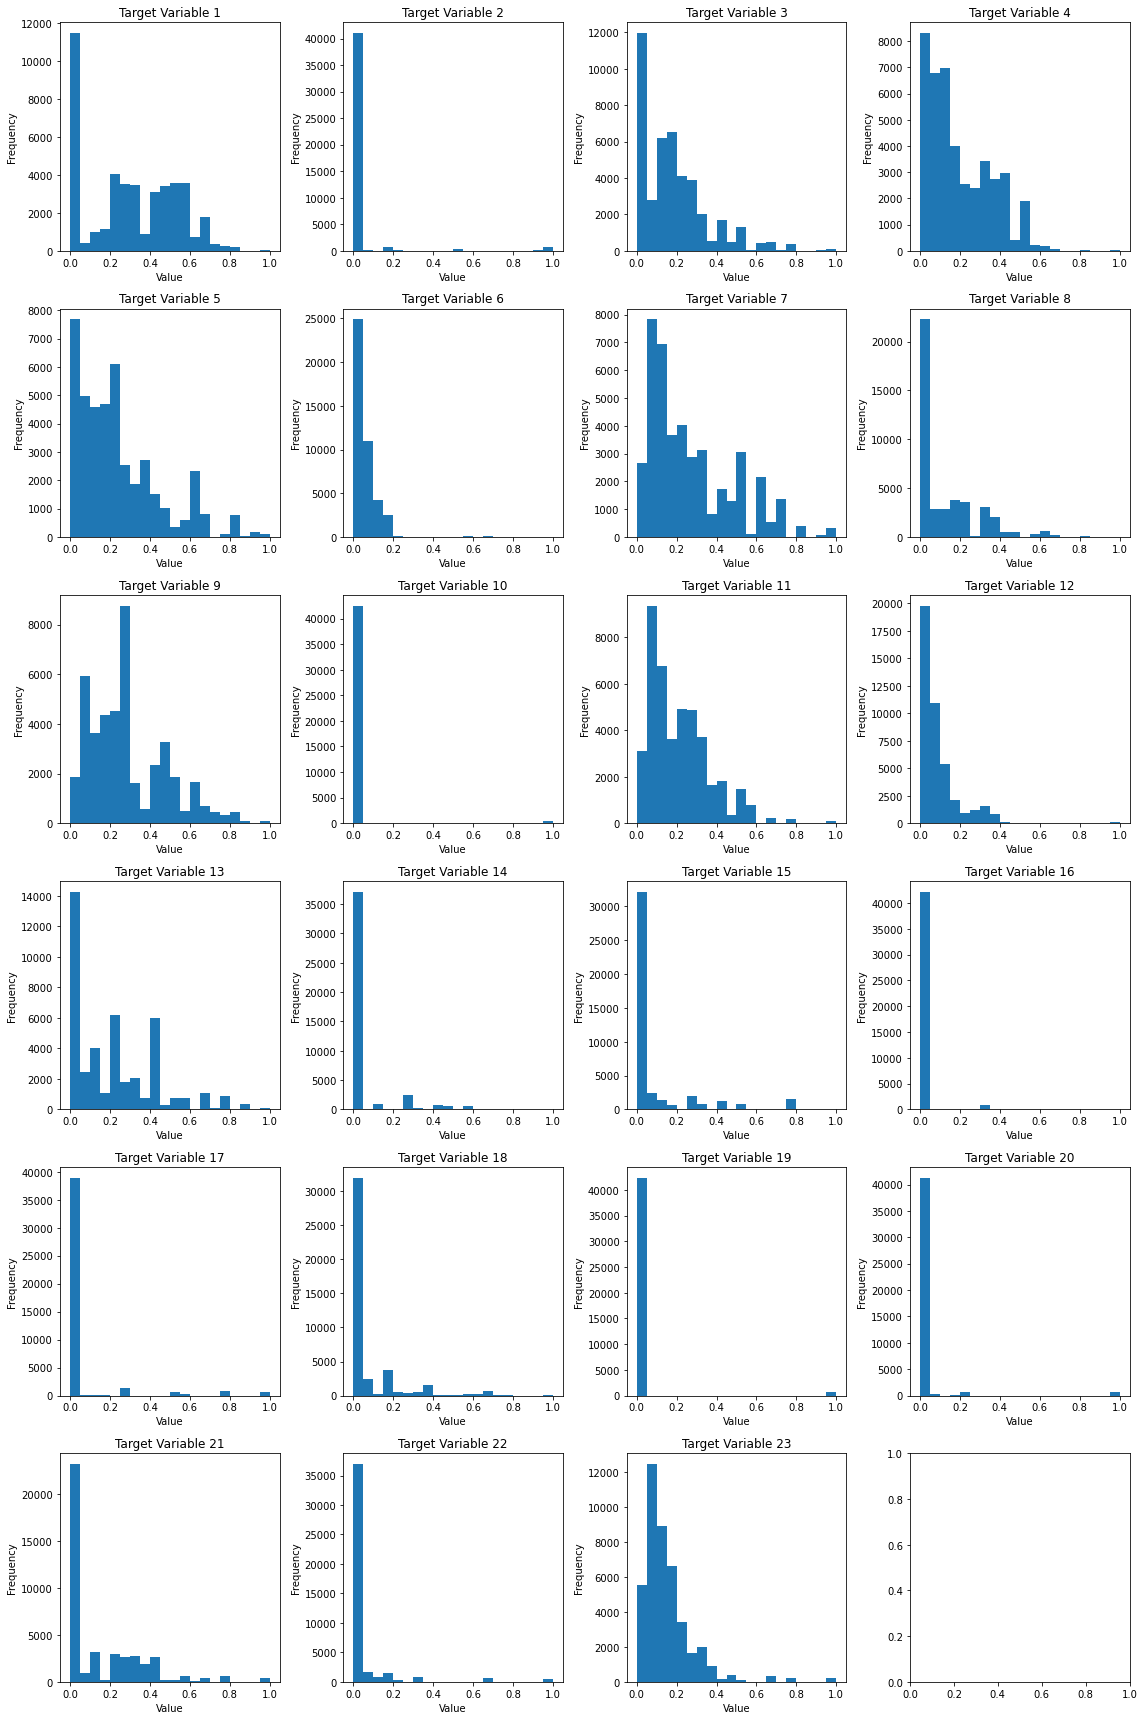

In [13]:
# create a figure with subplots
fig, axs = plt.subplots(6, 4, figsize=(16, 24))

# create histograms for each target variable
for i in range(23):
    row = i // 4
    col = i % 4
    axs[row, col].hist(y_array[:, i], bins=20)
    axs[row, col].set_title('Target Variable {}'.format(i+1))
    axs[row, col].set_xlabel('Value')
    axs[row, col].set_ylabel('Frequency')

# adjust the layout and display the figure
plt.tight_layout()
plt.show()

Train test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [15]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [16]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [17]:
mean_absolute_error(y_val, y_pred_knreg)

0.08800932621749757

In [18]:
mean_squared_error(y_val, y_pred_knreg)

0.024171438915130777

In [19]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.14897046101346878

In [20]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.381160340745479

In [21]:
#val
r2_score(y_val, y_pred_knreg)

0.041025592800863

Residual plots for each target variable

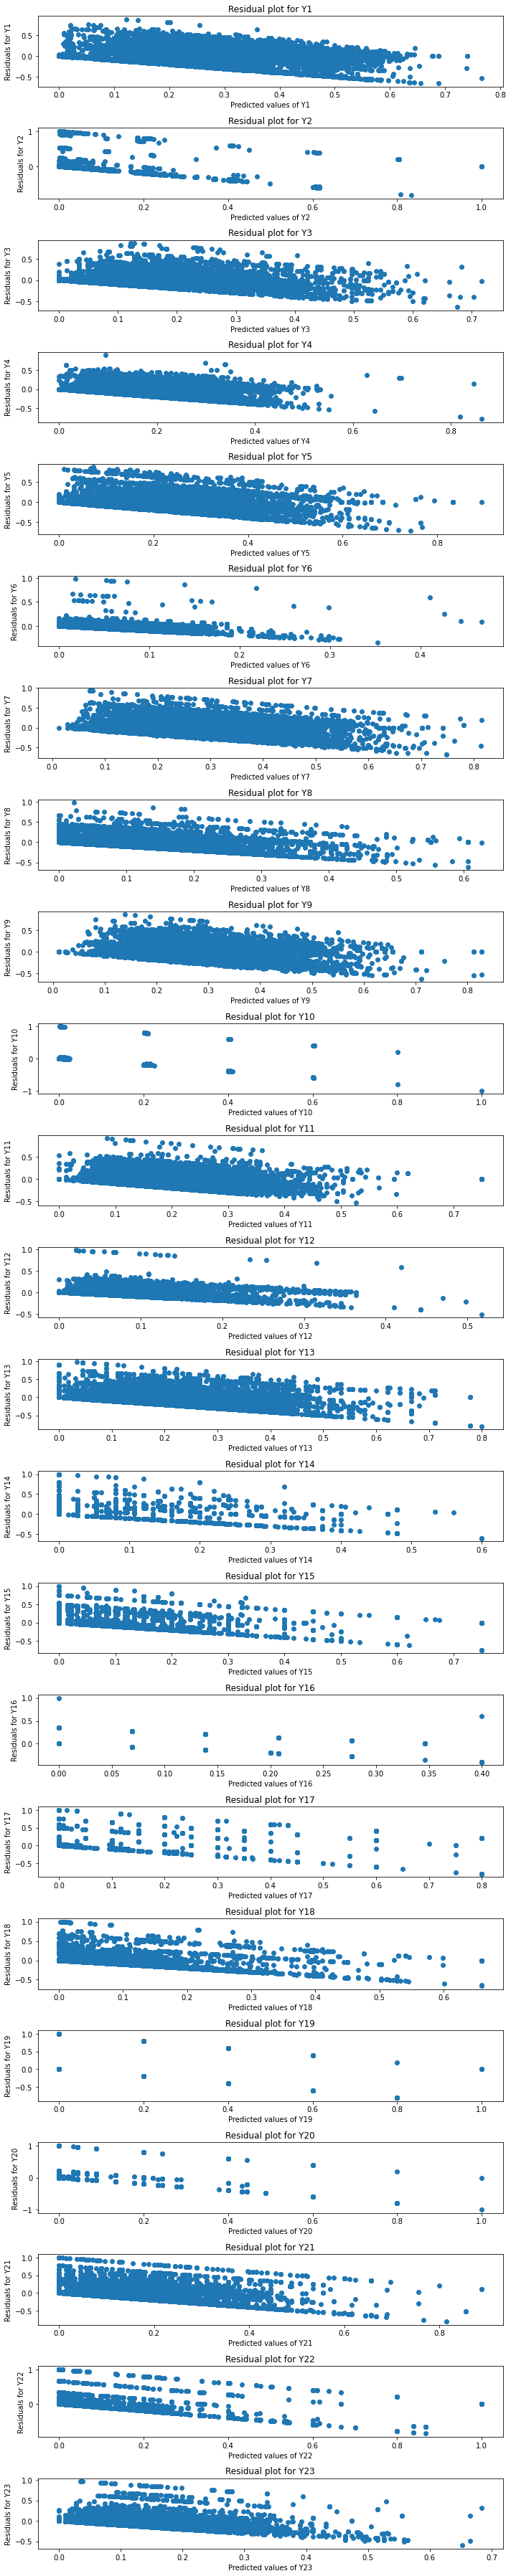

In [22]:
# Create residual plots for each target variable
num_targets = y_val.shape[1]  # 23 target variables
fig, axs = plt.subplots(num_targets, 1, figsize=(10, 50))

for i in range(num_targets):
    # Calculate residuals for target variable i
    #Y_predicted = model.predict(X)
    #Y_residuals = Y.iloc[:, i] - Y_predicted[:, i]
    #print(y_pred_knreg)
    y_residuals = y_val.iloc[:, i] - y_pred_knreg[:, i]
    # Create scatter plot of residuals against predicted values
    axs[i].scatter(y_pred_knreg[:, i], y_residuals)
    axs[i].set_xlabel('Predicted values of Y' + str(i+1))
    axs[i].set_ylabel('Residuals for Y' + str(i+1))
    axs[i].set_title('Residual plot for Y' + str(i+1))
    
plt.tight_layout()
plt.show()

Feature Selection

In [23]:
rfreg = RandomForestRegressor()

In [24]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

In [25]:
selector.estimator_.feature_importances_

array([1.16569282e-01, 1.09899934e-01, 1.15891190e-01, 1.16221912e-01,
       1.16804123e-01, 1.03616399e-02, 2.62180761e-02, 6.92945310e-03,
       3.49779564e-04, 4.07479752e-03, 7.06786212e-03, 1.78057464e-05,
       1.05315377e-02, 3.31577536e-04, 5.44485630e-03, 7.93114872e-03,
       1.02448980e-02, 9.86704692e-03, 3.80778286e-05, 1.15196502e-02,
       3.58034359e-05, 4.04095351e-05, 1.07833923e-02, 9.07171123e-03,
       1.24350840e-02, 3.59150723e-03, 1.00657675e-02, 3.24759730e-04,
       3.56513339e-05, 4.01471135e-03, 1.34743659e-02, 5.55811194e-05,
       1.04221217e-02, 2.16087174e-06, 0.00000000e+00, 9.07727759e-03,
       9.00037005e-03, 1.21819375e-02, 1.51743733e-03, 7.46890715e-04,
       3.76386286e-04, 7.14017786e-03, 4.41594160e-04, 1.06683512e-02,
       9.48888206e-04, 7.59544886e-03, 2.09966701e-03, 8.01247151e-04,
       8.41497755e-03, 2.69774957e-03, 1.69763913e-02, 1.16153072e-02,
       5.75243913e-03, 1.92862871e-03, 6.29230850e-03, 1.07721079e-03,
      

In [26]:
selector.threshold_

0.011627906976744184

In [27]:
mask = selector.get_support()

In [28]:
mask

array([ True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False])

In [29]:
selected_features = X.columns[mask]

In [30]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,indica,happy,relaxed,uplifted,diesel,lemon,vanilla
0,0.341025,0.182753,0.008214,0.140406,-0.156943,0,0,1,0,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,0,1,1,1,0,0,1
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,0,1,0,0,0,0,1
3,0.243491,0.034313,0.080290,-0.165609,0.019773,0,0,1,1,0,0,0
4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,1,1,1,0,0,0,0
42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,1,0,0,0,0,0,0
42974,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,0
42975,0.324915,0.131823,-0.099424,0.065491,0.038437,1,1,1,1,0,0,0


In [31]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'indica',
 'happy',
 'relaxed',
 'uplifted',
 'diesel',
 'lemon',
 'vanilla']

In [32]:
import joblib

joblib.dump(selector, "selector_knn_lsa_elbow.pkl")
joblib.dump(selected_X, "selected_X_knn_lsa_elbow.pkl")
joblib.dump(rfreg, "knn_rfreg_lsa_elbow.pkl")
joblib.dump(knreg, "knreg_lsa_elbow.pkl")

['knreg_lsa_elbow.pkl']

Train test split (after Feature Selection)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [34]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [35]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg)

0.0946808217676764

In [37]:
mean_squared_error(y_val, y_pred_knreg)

0.025972918888270854

In [38]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.15450284037104076

In [39]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.3208064349422288

In [40]:
#val
r2_score(y_val, y_pred_knreg)

-0.03576567524905863

Hyperparameter Tuning

In [41]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [42]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [43]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [44]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 15}

In [45]:
joblib.dump(rscv_knn, "rscv_knn_lsa_elbow.pkl")
joblib.dump(rscv_knn.best_params_, "rscv_knn_lsa_elbow_best_params.pkl")

['rscv_knn_lsa_elbow_best_params.pkl']

kNN (after hyperparameter tuning)

In [64]:
knreg_ht = KNeighborsRegressor(n_neighbors = 15, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [65]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.06746023614374917

In [66]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.129101233030831

In [67]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9676483544753182

In [68]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.2758268595995698

Residual plots after Hyperparameter Tuning

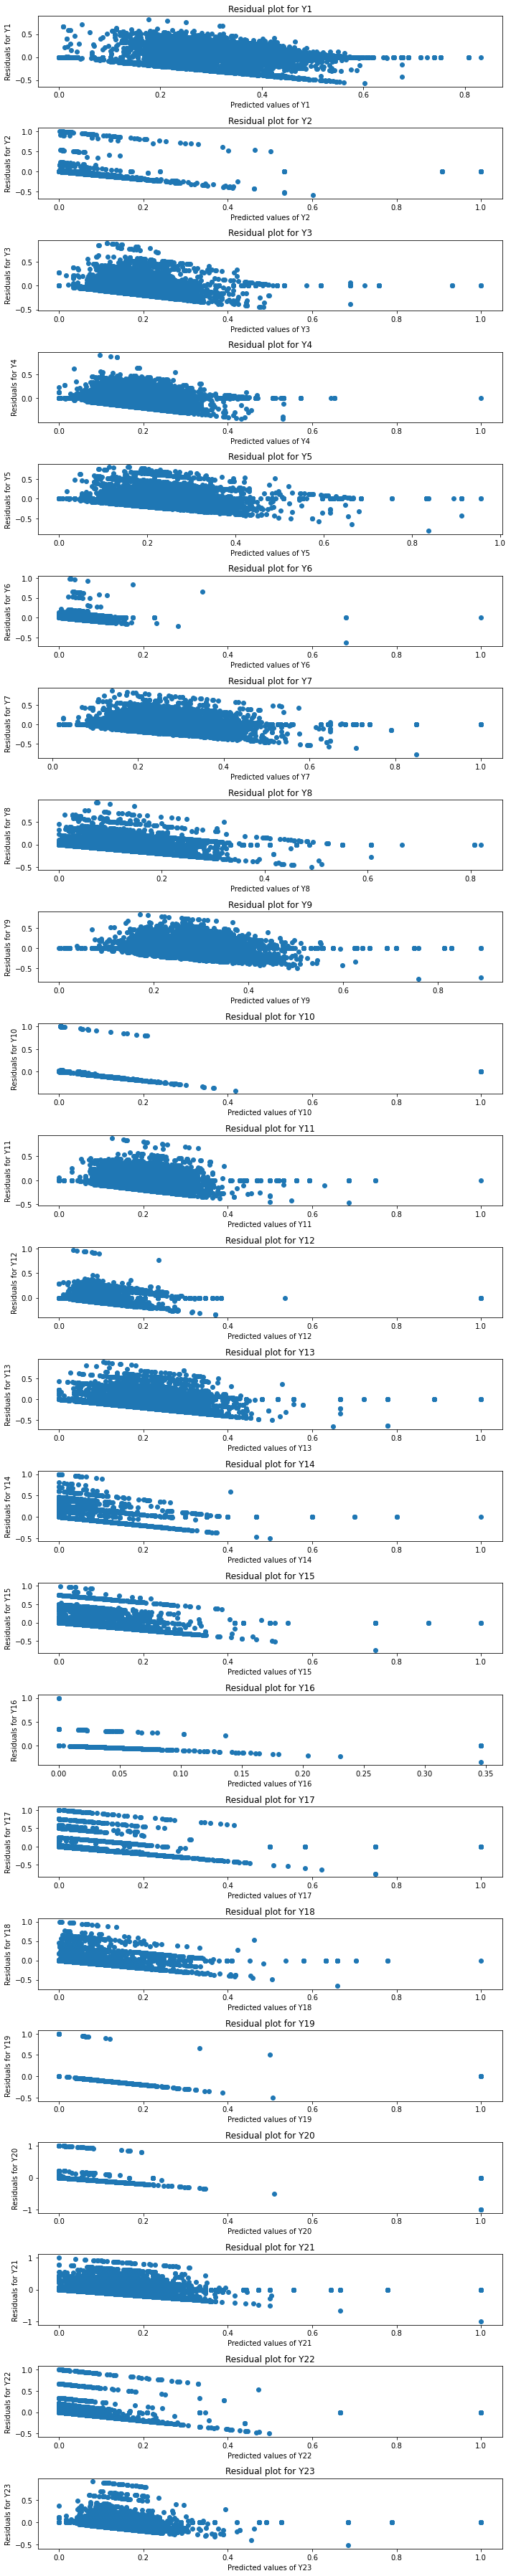

In [69]:
# Create residual plots for each target variable
num_targets = y_val.shape[1]  # 23 target variables
fig, axs = plt.subplots(num_targets, 1, figsize=(10, 50))

for i in range(num_targets):
    # Calculate residuals for target variable i
    #Y_predicted = model.predict(X)
    #Y_residuals = Y.iloc[:, i] - Y_predicted[:, i]
    #print(y_pred_knreg)
    y_residuals = y_val.iloc[:, i] - y_pred_knreg_ht[:, i]
    # Create scatter plot of residuals against predicted values
    axs[i].scatter(y_pred_knreg_ht[:, i], y_residuals)
    axs[i].set_xlabel('Predicted values of Y' + str(i+1))
    axs[i].set_ylabel('Residuals for Y' + str(i+1))
    axs[i].set_title('Residual plot for Y' + str(i+1))
    
plt.tight_layout()
plt.show()

Predicting model on the test set

In [70]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [71]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow.pkl")

['y_test_knreg_lsa_elbow.pkl']

In [72]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.06906505693414078

In [73]:
mean_squared_error(y_test, y_pred_knreg_test)

0.01875649475593745

In [74]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.13199734267990781

In [75]:
r2_score(y_test, y_pred_knreg_test)

0.26282452006363066

In [76]:
y_test

,X..Delta9-THC,X..CBD,X..CBN,X..CBG,X..CBC,X..THCV,X..D-Limonene,X..Beta-Ocimene,X..Beta-Myrcene,X..Beta-Pinene,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
6277,0.026002,0.001046,0.034483,0.034749,0.122807,0.010309,1.000000,0.153846,0.046875,0.022222,...,0.000000,0.000,0.0,0.0,0.021053,0.0,0.0,0.000000,0.0,0.263158
5626,0.000000,0.040812,0.034483,0.003861,0.017544,0.010309,0.037975,0.000000,0.242188,0.005556,...,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,0.444444,1.0,0.157895
10977,0.280718,0.005581,0.137931,0.530245,0.152047,0.096220,0.206751,0.606838,0.268229,0.012593,...,0.466667,0.750,0.0,0.0,0.659649,0.0,0.0,0.000000,0.0,0.017544
34451,0.587030,0.002093,0.137931,0.200772,0.368421,0.030928,0.101266,0.076923,0.492188,0.002222,...,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
24460,0.000000,0.001046,0.034483,0.003861,0.017544,0.010309,0.164557,0.000000,0.023438,0.004444,...,0.000000,0.000,0.0,0.0,0.021053,0.0,0.0,0.000000,0.0,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27510,0.419241,0.006383,0.227586,0.289575,0.203509,0.072165,0.088608,0.151282,0.440625,0.002556,...,0.000000,0.075,0.0,0.0,0.181053,0.0,0.0,0.100000,0.0,0.094737
39256,0.124853,0.001196,0.068966,0.131826,0.097744,0.022091,0.339964,0.000000,0.223214,0.005714,...,0.000000,0.000,0.0,0.0,0.010526,0.0,0.0,0.111111,0.0,0.233083
3343,0.249893,0.007011,0.155172,0.097297,0.236842,0.010309,0.091139,0.333333,0.539844,0.003667,...,0.000000,0.000,0.0,0.0,0.004211,0.0,0.0,0.000000,0.0,0.084211
1981,0.605384,0.000000,0.413793,0.223938,0.508772,0.154639,0.063291,0.051282,0.296875,0.002222,...,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.157895


In [77]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

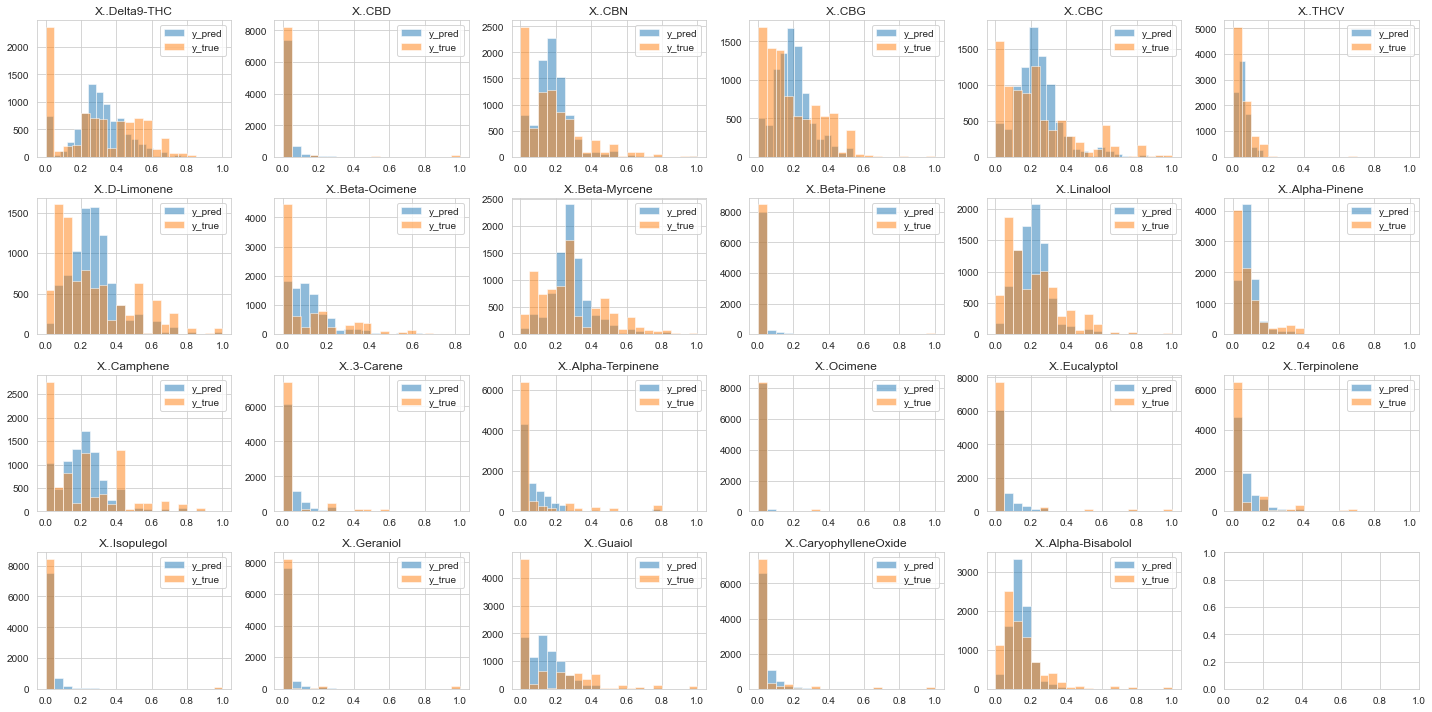

<Figure size 432x288 with 0 Axes>

In [84]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

for i, column in enumerate(y_test.columns):
    row = i // 6
    col = i % 6
    axs[row, col].hist(y_pred_knreg_test[:, i], alpha=0.5, label='y_pred', bins=20)
    axs[row, col].hist(y_test.iloc[:, i], alpha=0.5, label='y_true', bins=20)
    axs[row, col].legend(loc='upper right')
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()
plt.savefig('error_hist_knn_lsa_elbow.png')

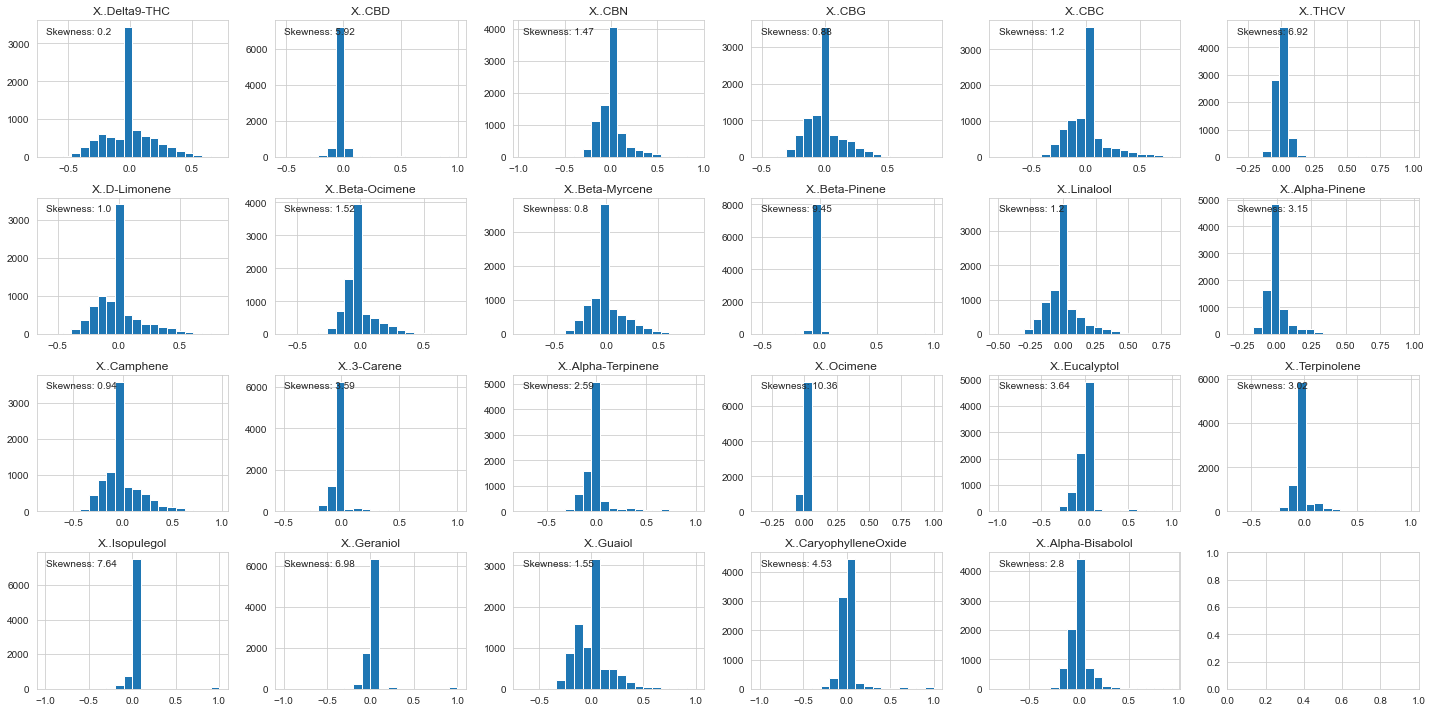

<Figure size 432x288 with 0 Axes>

In [85]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
errors = y_test - y_pred_knreg_test
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

for i, column in enumerate(y_test.columns):
    row = i // 6
    col = i % 6
    axs[row, col].hist(errors.iloc[:, i], bins=20)
    axs[row, col].set_title(column)
    axs[row, col].text(0.05, 0.9, f"Skewness: {np.round(errors.iloc[:, i].skew(), 2)}", transform=axs[row, col].transAxes)

plt.tight_layout()
plt.show()
plt.savefig('error_skew_knn_lsa_elbow.png')

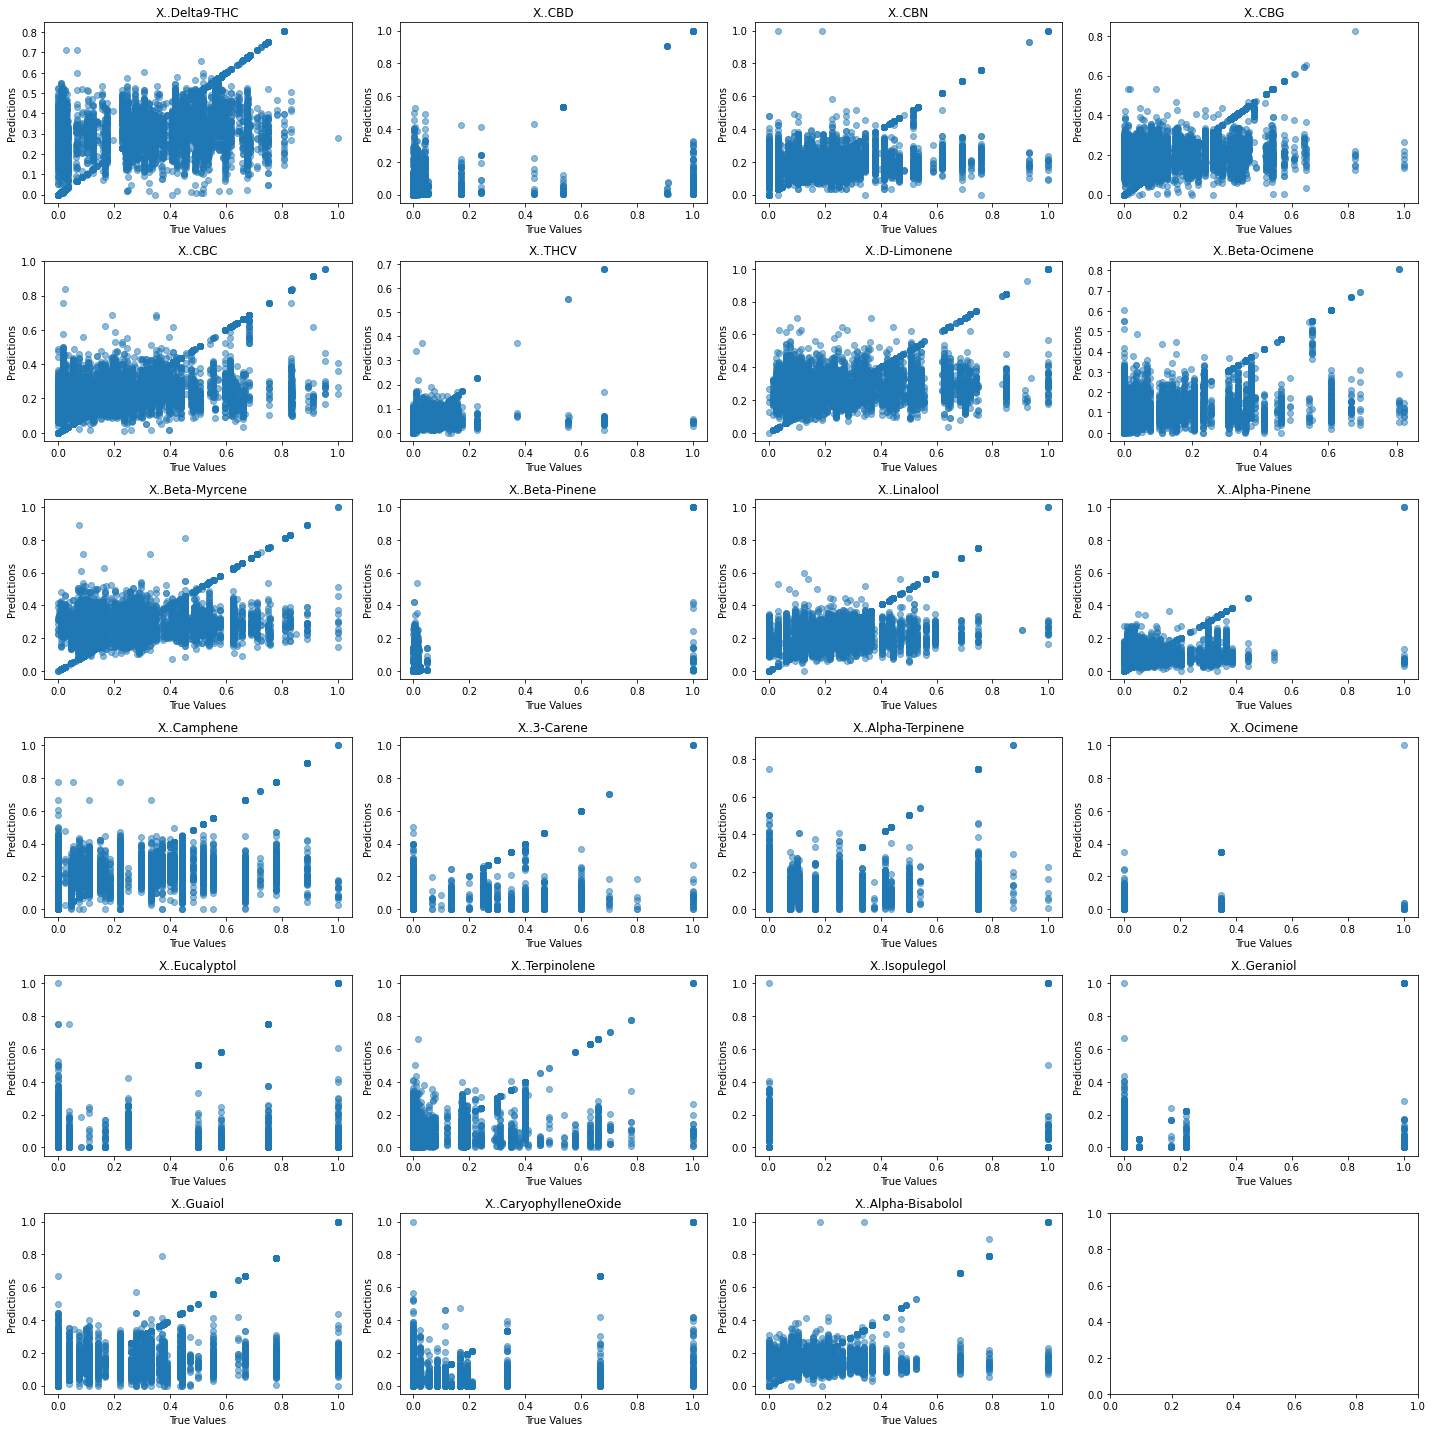

In [80]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))

for i, column in enumerate(y_test.columns):
    row = i // 4
    col = i % 4
    axs[row, col].scatter(y_test.iloc[:, i], y_pred_knreg_test[:, i], alpha=0.5)
    axs[row, col].set_xlabel('True Values')
    axs[row, col].set_ylabel('Predictions')
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()

Pearson R

In [81]:
for i in range(num_targets):
    true_values_i = y_test.iloc[:, i].values  # Get the true values for target i
    predicted_values_i = y_pred_knreg_test[:, i]  # Get the predicted values for target i
    r_i, p_i = pearsonr(true_values_i, predicted_values_i)  # Calculate Pearson correlation coefficient and p-value
    print(f"Target {i}: Pearson correlation coefficient={r_i}, p-value={p_i}")

Target 0: Pearson correlation coefficient=0.5411821228156886, p-value=0.0
Target 1: Pearson correlation coefficient=0.432093265298487, p-value=0.0
Target 2: Pearson correlation coefficient=0.5325384202124804, p-value=0.0
Target 3: Pearson correlation coefficient=0.5347180703697322, p-value=0.0
Target 4: Pearson correlation coefficient=0.519932318133802, p-value=0.0
Target 5: Pearson correlation coefficient=0.4274287690012363, p-value=0.0
Target 6: Pearson correlation coefficient=0.553700890472945, p-value=0.0
Target 7: Pearson correlation coefficient=0.5693018296767338, p-value=0.0
Target 8: Pearson correlation coefficient=0.5205935971164406, p-value=0.0
Target 9: Pearson correlation coefficient=0.5817040580821589, p-value=0.0
Target 10: Pearson correlation coefficient=0.5449089454089762, p-value=0.0
Target 11: Pearson correlation coefficient=0.4955850509123899, p-value=0.0
Target 12: Pearson correlation coefficient=0.5336389262197492, p-value=0.0
Target 13: Pearson correlation coeffic

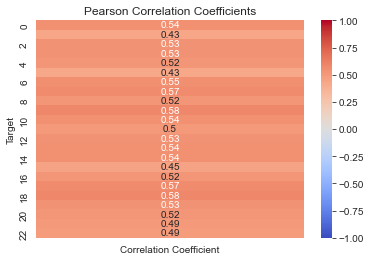

In [83]:
import seaborn as sns

results = []
for i in range(num_targets):
    true_values_i = y_test.iloc[:, i].values  # Get the true values for target i
    predicted_values_i = y_pred_knreg_test[:, i]  # Get the predicted values for target i
    r_i, p_i = pearsonr(true_values_i, predicted_values_i)  # Calculate Pearson correlation coefficient and p-value
    results.append({
        'Target': i,
        'Correlation Coefficient': r_i,
        'P-value': p_i
    })

df = pd.DataFrame(results)

sns.set_style("whitegrid")
corr_heatmap = sns.heatmap(df.pivot_table(index='Target', columns=None, values='Correlation Coefficient'),
                           annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
corr_heatmap.set_title('Pearson Correlation Coefficients')

plt.savefig('pearson_heatmap_knn_lsa_elbow.png')